In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import time

from random import randint

# Simulation of critical systems

Simple demonstration of self-organized criticality. The simulation is based on Per Bak's (*How Nature Works*, 1947) relation of a metaphor presented first by Peter Grassberger.

> Peter Grassberger, a computational physicist at the University Wupertal has come up with an amusing representation of the model. He asks us to think about a large office where bureaucrats sit at tables organized in rows. Every now and then a piece of paper from the outside enters the desk of a random bureaucrat. He does not deal with it until he finds too many pieces of paper on his desk. He then sends one piece of paper to each of his four neighbors. Everybody follows this rule, except those placed along the walls, who simply throw the paper out the window. Jumping forward a little bit, we shall see that a single piece of paper entering the office can lead to a bureaucratic catastophe where millions of transfers of paper take place (if the office is large enough!)

## Variable declaration

In [2]:
SPAN_OF_GRID = 100
MAX_ITEMS_PER_CELL = 4

NUM_ITERATIONS = 1000000
SECONDS_PER_ITERATION = 0.1
INCREMENTATION_VALUE = 1

TRANSFORMS = [(1,0),
              (-1,0),
              (0,1),
              (0,-1)]

DISPLAY_EVERY = 10000

## Allocation of the space

In [3]:
GRID_OF_VALUES = np.zeros((SPAN_OF_GRID, SPAN_OF_GRID))
CASCADES = [0]
FIGSIZE = (20, 5)

## Random incrementation

In [4]:
def increment_a_value_in_grid(grid_of_values: np.ndarray = GRID_OF_VALUES, 
                              incremetation_value: int = INCREMENTATION_VALUE):
    
    # pick a random spot on the grid
    width = grid_of_values.shape[0]
    height = grid_of_values.shape[1]
    
    # increment by incrementation value
    x_val = randint(0, width-1)
    y_val = randint(0, height-1)
    grid_of_values[x_val, y_val] += 1
    
    return grid_of_values

## Display simulation

In [5]:
%matplotlib notebook

def display_outcome(iteration: int, grid_of_values: np.ndarray = GRID_OF_VALUES, cascades = CASCADES):
    
    plt.subplot(1,2,1)
    plt.contourf(grid_of_values)#, 100, vmin=0, vmax=MAX_ITEMS_PER_CELL)
    plt.axis('scaled')
    plt.title('Iteration {}'.format(iteration))
    
    plt.subplot(1,2,2)
    plt.hist(cascades, log=True, bins=20)
    plt.xscale('log')
    plt.ylabel('Count')
    plt.xlabel('Num cascades in a row')
    plt.title('Cascades per iteration')
    
    fig.canvas.draw()
    plt.show()
    time.sleep(SECONDS_PER_ITERATION)
    plt.gcf().clear()


## Play through simulation

In [6]:
def play_through_simulation(iteration: int,
                            grid_of_values: np.ndarray = GRID_OF_VALUES,
                            max_items_per_cell: int = MAX_ITEMS_PER_CELL):
    
    points_where_above = np.argwhere(grid_of_values >= max_items_per_cell)
    
    for (x, y) in points_where_above:
        grid_of_values[x, y] = 0
        for (dx, dy) in TRANSFORMS:
            try:
                grid_of_values[x + dx, y + dy] = grid_of_values[x + dx, y + dy] + 1
            except:
                continue

    if iteration % DISPLAY_EVERY == 0:
        try:
            display_outcome(iteration=iteration)
        except Exception:
            pass

## Simulation and visualization

<IPython.core.display.Javascript object>


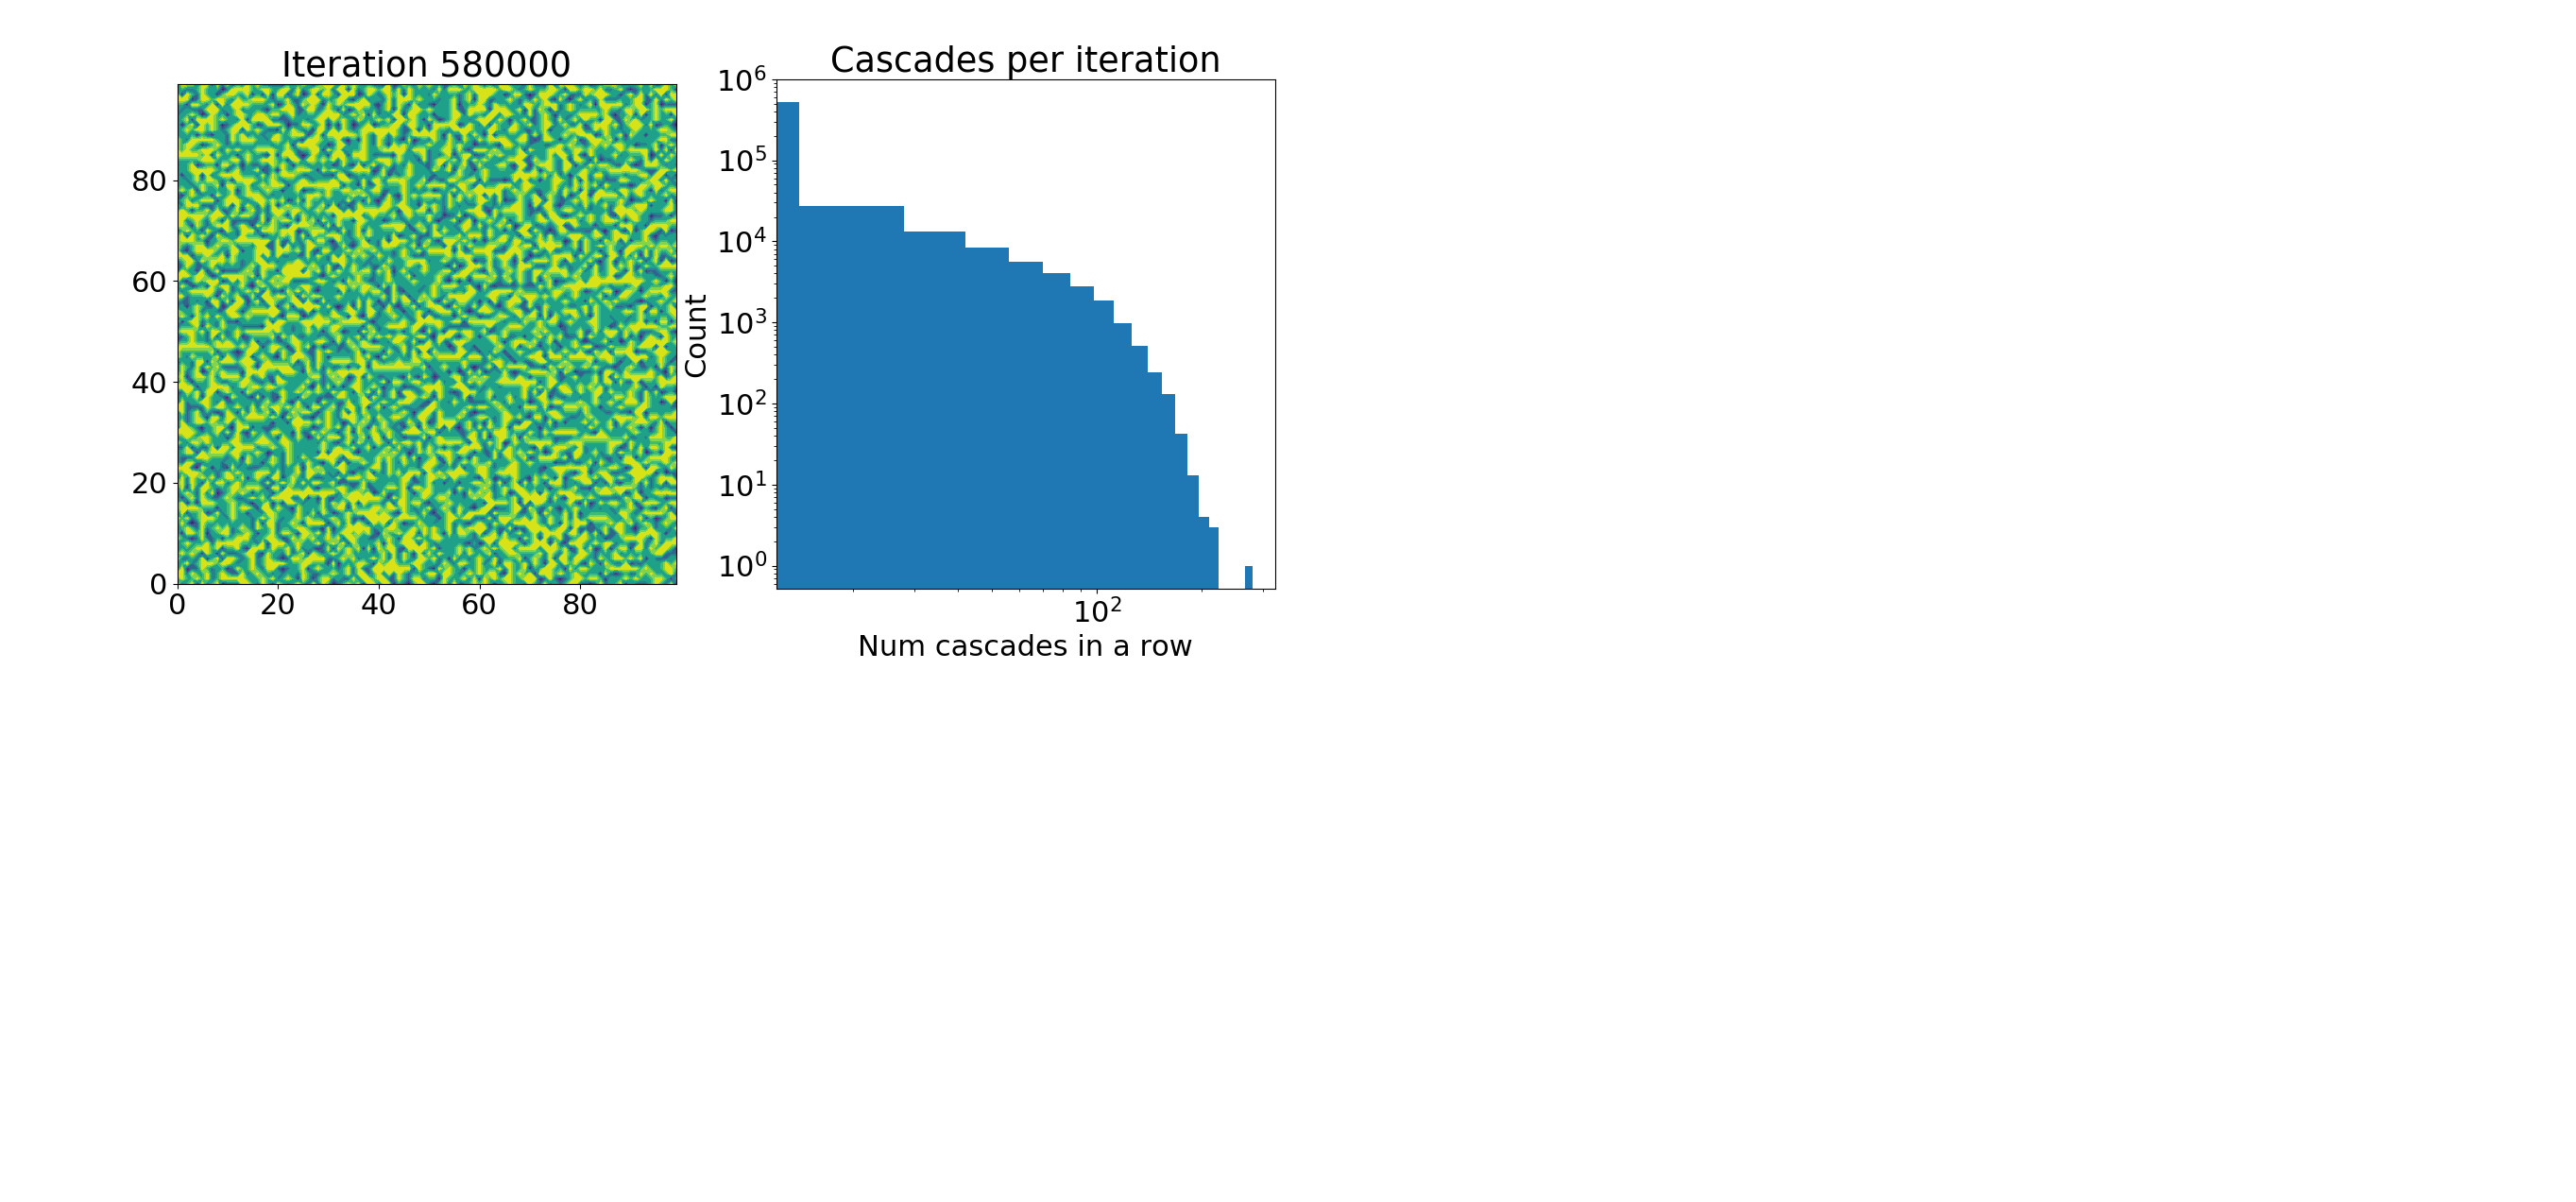

/Users/peterbryan/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3285: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1.0, top=1.0
  'bottom=%s, top=%s') % (bottom, top))


KeyboardInterrupt: 

In [7]:
fig = plt.figure()
fig.set_size_inches(15, 7, forward=True)
matplotlib.rcParams.update({'font.size': 22})

for iteration in range(0, NUM_ITERATIONS):
    increment_a_value_in_grid()
    
    n_cascades = 0
    play_through_simulation(iteration=iteration)
        
    while (GRID_OF_VALUES >= MAX_ITEMS_PER_CELL).any():
            n_cascades += 1
            play_through_simulation(iteration=iteration)
            
    CASCADES.append(n_cascades)